In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../assets/student_job_placement_dataset.csv")
df.sample(2)

,Status,Experience,Skills,Certification,Degree
172,Placed,1,7,No,Postgraduate
411,Placed,4,8,Yes,Postgraduate


In [3]:
placement_status_dict={
    "Placed":1,
    "Not Placed":0
}
df.isnull().sum()

Status           0
Experience       0
Skills           0
Certification    0
Degree           0
dtype: int64

In [4]:
df["Status"] = df["Status"].str.strip()
df["Status"]=df["Status"].map(placement_status_dict)
df.sample(10)

,Status,Experience,Skills,Certification,Degree
400,1,1,9,Yes,Diploma
74,1,3,8,Yes,Undergraduate
300,1,3,0,No,Diploma
233,1,3,4,No,Postgraduate
116,1,0,9,No,Postgraduate
82,1,5,4,No,Postgraduate
118,1,4,1,No,Diploma
50,0,1,1,No,Undergraduate
72,1,4,8,Yes,Diploma
310,1,2,10,No,Diploma


In [5]:
certificatiom_dict={
    "Yes":1,
    "No":0
}
df["Certification"]=df["Certification"].map(certificatiom_dict)
df.sample(6)

,Status,Experience,Skills,Certification,Degree
129,1,1,6,0,Postgraduate
444,1,4,1,1,Postgraduate
5,1,1,10,0,Undergraduate
468,1,2,3,1,Diploma
323,1,3,3,0,Undergraduate
130,1,3,7,1,Diploma


In [6]:

degree_order = [['Diploma', 'Undergraduate', 'Postgraduate']]
ode=OrdinalEncoder(categories=degree_order)

encoded=ode.fit_transform(df[["Degree"]])
df["Degree"]=encoded

In [7]:


# Plot the distribution of 'Degree' after encoding
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df, x='Degree', hue='Status', palette='viridis')

# Add labels and title
plt.title("Distribution of Degrees by Placement Status", fontsize=16)
plt.xlabel("Degree (0=Diploma, 1=Undergraduate, 2=Postgraduate)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Status", labels=["Not Placed", "Placed"], fontsize=10)

# Display the plot
plt.show()


NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

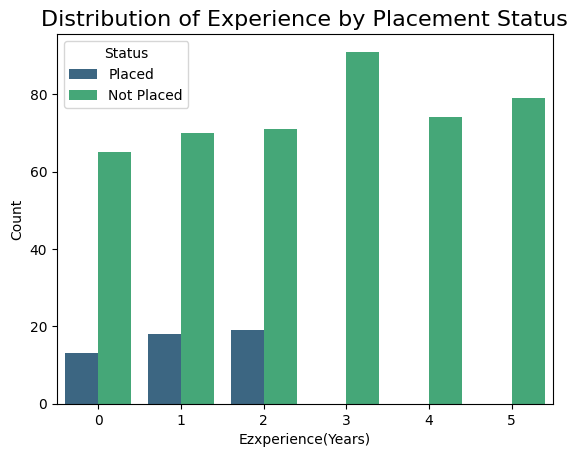

In [521]:
plt.Figure(figsize=(15,7))
sns.countplot(df,x="Experience",hue="Status",palette="viridis")
plt.title("Distribution of Experience by Placement Status", fontsize=16)
plt.legend(title="Status",labels=["Placed","Not Placed"], fontsize=10)
plt.ylabel("Count")
plt.xlabel("Ezxperience(Years)")
plt.show()

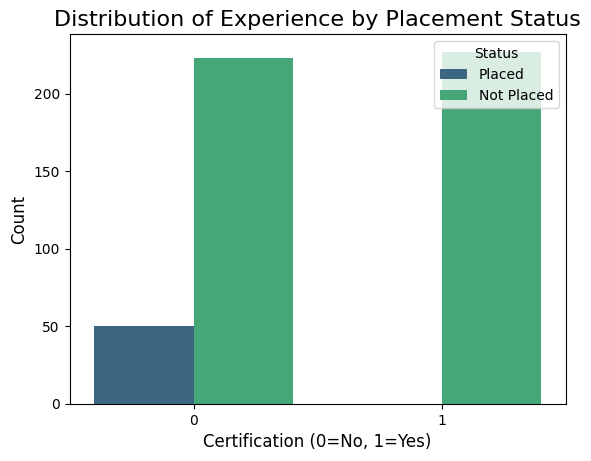

In [522]:
plt.Figure(figsize=(15,7))
sns.countplot(df,x="Certification",hue="Status",palette="viridis")
plt.title("Distribution of Experience by Placement Status", fontsize=16)
plt.legend(title="Status",labels=["Placed","Not Placed"], fontsize=10)
plt.xlabel("Certification (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

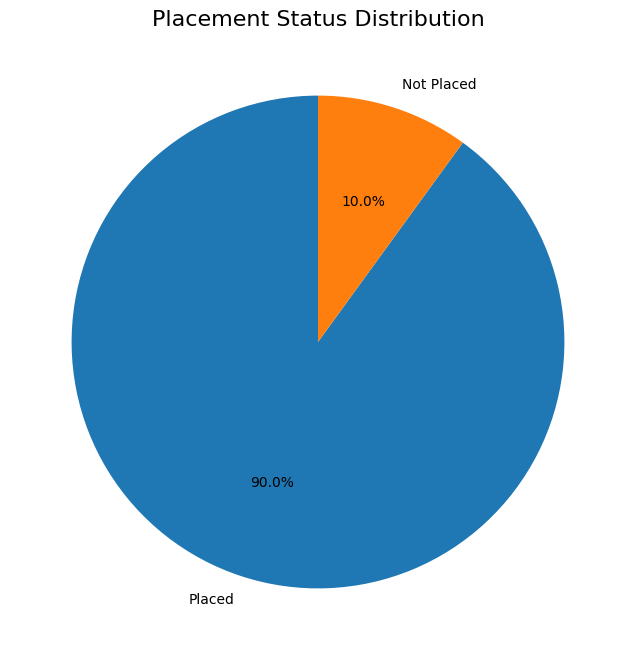

In [523]:

placement_counts = df['Status'].value_counts()
labels = ['Placed', 'Not Placed']
plt.figure(figsize=(8, 8))
plt.pie(placement_counts, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title("Placement Status Distribution", fontsize=16)
plt.show()


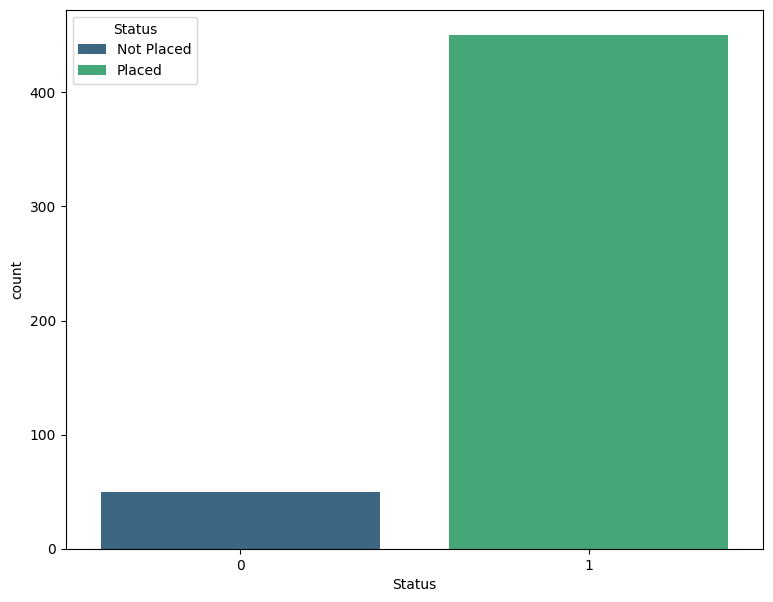

In [524]:
plt.figure(figsize=(9,7))
sns.countplot(df,x="Status",hue="Status",palette="viridis")
plt.legend(title="Status",labels=["Not Placed","Placed"])
plt.show()


In [64]:
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,1:],df[["Status"]],random_state=42,test_size=0.3)

In [526]:


def train_tree(max_depth=4):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(x_train, y_train)
    
    plot_tree(clf, filled=True)
    plt.show()
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print("Accuracy score={}".format(accuracy))
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df["Experience"], df["Skills"], c=df["Status"], cmap="viridis", edgecolor="k")
    plt.colorbar(scatter, label="Placement Status")

    x_min, x_max = df["Experience"].min(), df["Experience"].max()
    y_min, y_max = df["Skills"].min(), df["Skills"].max()
    x_range = np.linspace(x_min, x_max, 100)
    y_range = np.linspace(y_min, y_max, 100)
    xx1, xx2 = np.meshgrid(x_range, y_range)


    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel(), np.zeros(xx1.ravel().shape), np.zeros(xx1.ravel().shape)])  # Add zeros for the other two features
    y_hat = y_hat.reshape(xx1.shape)


    plt.contourf(xx1, xx2, y_hat, alpha=0.2, cmap="viridis")
    plt.xlabel("Experience")
    plt.ylabel("Skills")
    plt.title("Decision Tree Boundary")
    plt.show()

    return clf





              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.91      0.95        92

    accuracy                           0.92       100
   macro avg       0.75      0.96      0.81       100
weighted avg       0.96      0.92      0.93       100

score -0.0869565217391306
0.92
precsiion:1.0
recall:0.9130434782608695
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         8
           1       1.00      0.91      0.95        92

    accuracy                           0.92       100
   macro avg       0.75      0.96      0.81       100
weighted avg       0.96      0.92      0.93       100



/home/jeevan/Desktop/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
import pickle as pk
from sklearn.metrics import classification_report,r2_score

In [94]:

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()


In [95]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print("score",r2_score(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00       141

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

score 1.0
1.0


In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, x_train.values, y_train, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())


Cross-validation scores: [1.         1.         0.98571429 1.         0.98571429]
Mean CV score: 0.9942857142857143


In [98]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  f1_score,recall_score,classification_report,r2_score
lr=LogisticRegression(C=10,solver='liblinear',class_weight="balanced")
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))
print("score",r2_score(y_test,y_pred))
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)
from sklearn.metrics import precision_score
p=precision_score(y_test,y_pred)
r=recall_score(y_test,y_pred)
print(f"precsiion:{p}")
print(f"recall:{r}")
y_prob = lr.predict_proba(x_test)[:, 1]  
y_pred_adjusted = (y_prob >= 0.6).astype(int)  
print(classification_report(y_test, y_pred_adjusted))


              precision    recall  f1-score   support

           0       0.43      1.00      0.60         9
           1       1.00      0.91      0.96       141

    accuracy                           0.92       150
   macro avg       0.71      0.96      0.78       150
weighted avg       0.97      0.92      0.93       150

score -0.41843971631205634
0.92
precsiion:1.0
recall:0.9148936170212766
              precision    recall  f1-score   support

           0       0.41      1.00      0.58         9
           1       1.00      0.91      0.95       141

    accuracy                           0.91       150
   macro avg       0.70      0.95      0.77       150
weighted avg       0.96      0.91      0.93       150



In [9]:
df.to_csv("../assets/cleaned_data.csv")